In [ ]:
import pandas as pd

# Load the dataset
df=pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Exploration

In [ ]:
# Exploring the data
df.info()
print(df.head())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
               age          bmi     children       charges
count  1338.000000  1338.000000  1338

In [ ]:
# Checking for missing values
print(df.isnull().sum()) # No missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
# Cheking for duplicated
print(df.duplicated().sum()) # One redundant value present

0


In [ ]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum()) # No duplicates present

0


Text(0.5, 1.0, 'Age vs Charges (by Smoker Status)')

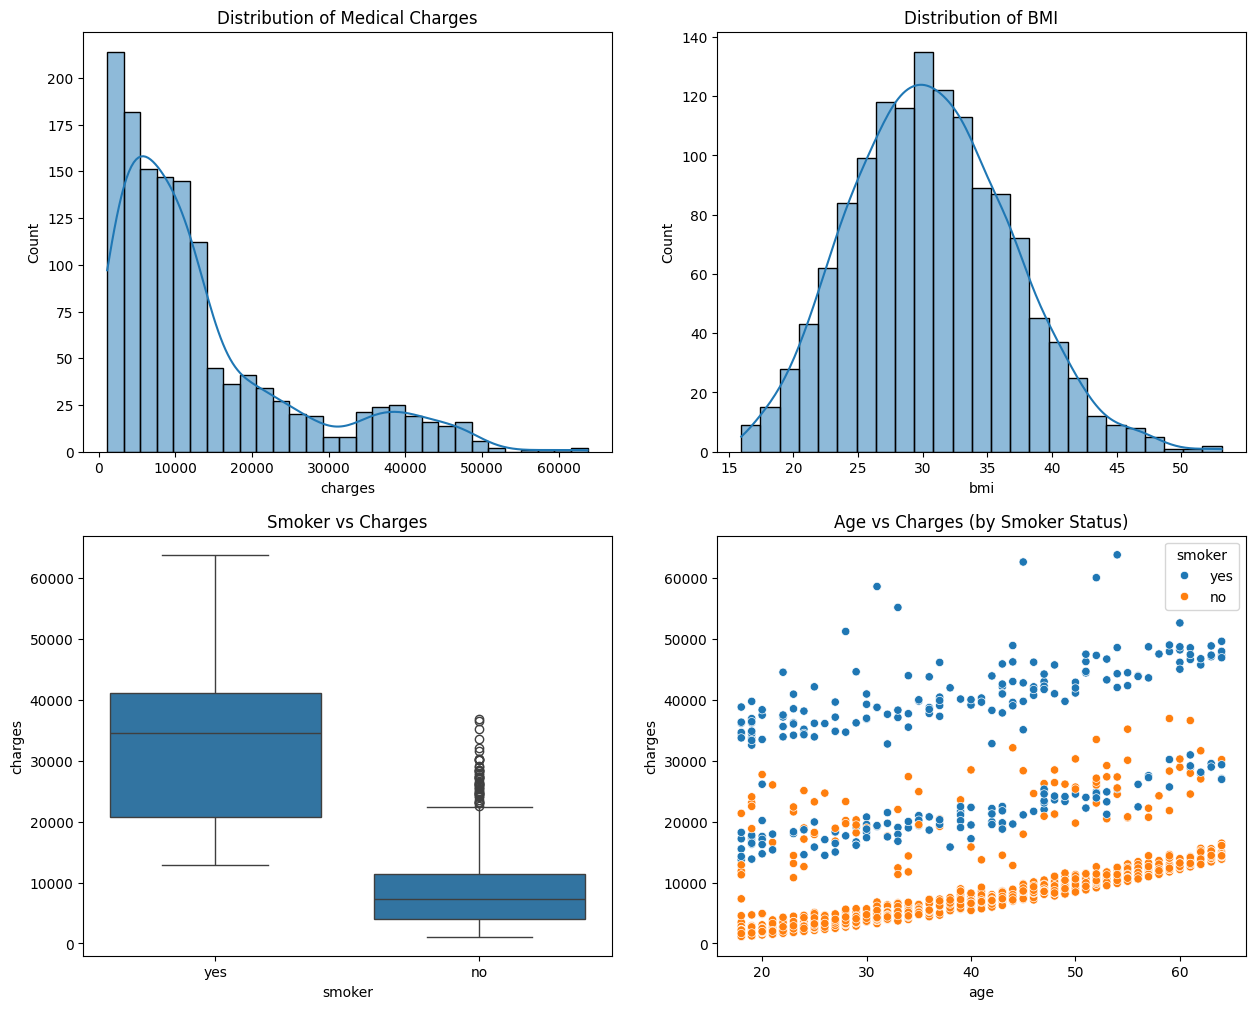

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the relation between the features and the target variable
fig, axes=plt.subplots(2, 2, figsize=(15, 12))

# Distribution of target variable 'charges'
sns.histplot(df['charges'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Medical Charges')

# Distribution of 'bmi'
sns.histplot(df['bmi'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of BMI')

# Relationship between smoker and charges
sns.boxplot(x='smoker', y='charges', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Smoker vs Charges')

# Relationship between age and charges
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Age vs Charges (by Smoker Status)')

In [ ]:
# The target variable is right skewed with most individuals paying lower premiums, while a smaller group pays significantly higher amounts
# There is a huge difference in insurance charges between smokers and non-smokers.
# As age increases, insurance charges tend to increase linearly.
# Higher Body Mass Index is generally associated with higher charges especially among smokers.

# Data Preprocessing

<Axes: >

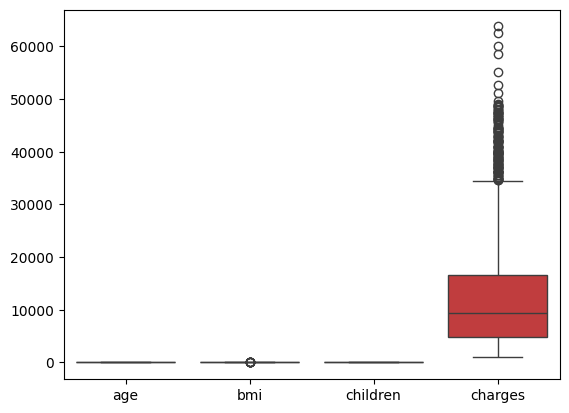

In [ ]:
# Checking for outliers
sns.boxplot(df)

In [ ]:
# Function to handle outliers
def cap_outliers(data, columns):

   for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3 - Q1

        lower_limit=Q1 - 1.5 * IQR
        upper_limit=Q3 + 1.5 * IQR

        df.loc[:, col]=df[col].clip(lower_limit, upper_limit)

In [ ]:
num_col=df.select_dtypes(include='number')
num_col

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [ ]:
cap_outliers(df,num_col)

<Axes: >

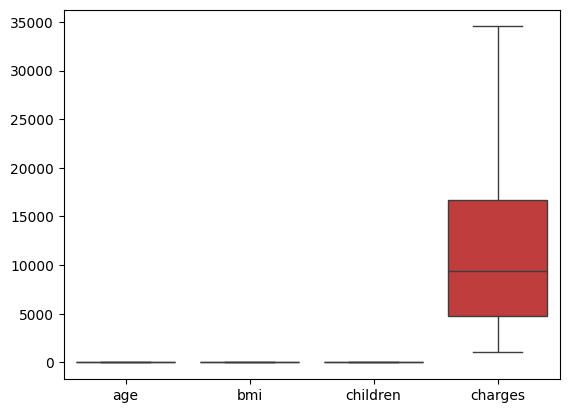

In [ ]:
sns.boxplot(df) # Outliers handled

In [ ]:
# Encoding the categorical values using one hot encoding
df_encoded=pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True, dtype=int)
df_encoded # Categorical values encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [ ]:
# Scaling the values
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scale_cols=['age', 'bmi', 'children']
df_encoded[scale_cols]=scaler.fit_transform(df_encoded[scale_cols])
df_encoded # Successfully scaled the values

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.454032,-0.909234,16884.92400,0,1,0,0,1
1,-1.511647,0.515033,-0.079442,1725.55230,1,0,0,1,0
2,-0.799350,0.387915,1.580143,4449.46200,1,0,0,1,0
3,-0.443201,-1.311662,-0.909234,21984.47061,1,0,1,0,0
4,-0.514431,-0.292246,-0.909234,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.767704,0.052787,1.580143,10600.54830,1,0,1,0,0
1334,-1.511647,0.209621,-0.909234,2205.98080,0,0,0,0,0
1335,-1.511647,1.023503,-0.909234,1629.83350,0,0,0,1,0
1336,-1.297958,-0.800716,-0.909234,2007.94500,0,0,0,0,1


# Model Development

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Preparing the feature and target variables
X=df_encoded.drop('charges', axis=1)
y=df_encoded['charges']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

# Linear Regression is used
model=LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_pred=model.predict(X_test)

# Evaluating the model's performance

In [ ]:
# Evaluating the metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.4f}")

Mean Absolute Error: 3107.71
Mean Squared Error: 22039423.94
Root Mean Squared Error: 4694.62
R-squared: 0.8016


In [ ]:
# Compiling the feature importance to interpret the model's findings
coefficients=pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients.sort_values(by='Coefficient', ascending=False))


Model Coefficients:
                   Coefficient
smoker_yes        19732.113647
age                3101.823447
bmi                1340.676489
children            546.487014
sex_male           -106.006567
region_northwest   -268.542604
region_southwest   -437.621797
region_southeast   -699.301958


# *1. "Smoking" is the most significant predictor which increases the predicted annual insurance charge by approximately $19,732, holding all other factors constant.*


# *2. For every one-year increase in age, the insurance charge is expected to increase by about $3101.*

# *3. Higher BMI significantly adds to the cost.*